### 간단한 데이터를 만들어서 RNN의 구조를 익혀보자!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### 데이터셋 구축하기
- 글자 하나하나 단위로 RNN을 사용해보자!
- hello, apple, lobby, daddy, bobby

In [2]:
# 문제 데이터는 hell, appl, lobb,dadd, bobb
# 정답 데이터는 o, e, y, y, y

# timesteps는 4

#### 원핫인코딩으로 문자를 숫자로 변경

- 문제 + 정답 전체 데이터에서 등장하는 문자는 h, e, l, o, a, p, b, y, d 로 총 9개

In [3]:
# RNN 데이터 구조파악을 위해 원핫인코딩을 직접 해보자!

In [4]:
# 문제 데이터
X_train = np.array(
    [
        # 각각의 단어들
        [[1,0,0,0,0,0,0,0,0],[0,1,0,0,0,0,0,0,0],[0,0,1,0,0,0,0,0,0],[0,0,1,0,0,0,0,0,0]],           
        [[0,0,0,0,1,0,0,0,0],[0,0,0,0,0,1,0,0,0],[0,0,0,0,0,1,0,0,0],[0,0,1,0,0,0,0,0,0]],
        [[0,0,1,0,0,0,0,0,0],[0,0,0,1,0,0,0,0,0],[0,0,0,0,0,0,1,0,0],[0,0,0,0,0,0,1,0,0]],
        [[0,0,0,0,0,0,0,0,1],[0,0,0,0,1,0,0,0,0],[0,0,0,0,0,0,0,0,1],[0,0,0,0,0,0,0,0,1]],
        [[0,0,0,0,0,0,1,0,0],[0,0,0,1,0,0,0,0,0],[0,0,0,0,0,0,1,0,0],[0,0,0,0,0,0,1,0,0]]
    ]
)

In [5]:
# 정답 데이터
y_train = np.array(
    [
        [0,0,0,1,0,0,0,0,0],
        [0,1,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,1,0],
        [0,0,0,0,0,0,0,1,0],
        [0,0,0,0,0,0,0,1,0]
    ]
)

In [6]:
X_train.shape, y_train.shape
# samples(샘플수), timesteps(순환횟수), features(정답에 들어갈 수 있는 숫자의 개수 = 원핫인코딩된 레이블 수)

((5, 4, 9), (5, 9))

#### 출력되는 값을 알파벳 전체로 하고 싶다면 26개로 원핫 인코딩 하면 됨
 - 현재는 RNN을 알아보기 위해 간단히 9개의 단어로만 문제와 정답을 설정함

### RNN 신경망 모델링 

In [7]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

In [8]:
model = Sequential()

# 입력층 + 중간층
# 8개의 뉴런을 가지고 각 뉴련이 4번씩 순환하며 각 순환마다 9개의 숫자가 들어감
#  timesteps(순환횟수), features(원핫인코딩)
model.add(SimpleRNN(8, input_shape=(4,9)))  

# 출력층
# 사용되는 단어가 총 9개이고 정답도 거기에 포함이 되어있음(다중분류와 같음)
model.add(Dense(9, activation='softmax'))
model.summary()

# RNN은 가중치가 두 종류가 있음(과거데이터의 가중치, 현재데이터의 가중치)
# 현재데이터의 가중치 -> 9(입력특성) * 8(RNN층 뉴런 수) + 8(Rnn층 뉴런수)
# 과거데이터의 가중치 -> 8(RNN층 뉴런 수) * 8(RNN층 뉴런수)
# RNN층의 각 뉴런들이 뽑아낸 겨로가는 다시 모든 뉴런들에게 과거데이터로 들어가게됨
# (순환횟수와는 상관없이 최종 결과값에 대한 가중치를 카운트)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 8)                 144       
_________________________________________________________________
dense (Dense)                (None, 9)                 81        
Total params: 225
Trainable params: 225
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(loss='categorical_crossentropy',
             optimizer='Adam',
             metrics=['acc']
             )

In [10]:
h = model.fit(X_train, y_train, epochs=200)

Train on 5 samples
Epoch 1/200
5/5 [==============================] - 1s 263ms/sample - loss: 2.6466 - acc: 0.0000e+00
Epoch 2/200
5/5 [==============================] - 0s 3ms/sample - loss: 2.6324 - acc: 0.0000e+00
Epoch 3/200
5/5 [==============================] - 0s 998us/sample - loss: 2.6183 - acc: 0.0000e+00
Epoch 4/200
5/5 [==============================] - 0s 1ms/sample - loss: 2.6043 - acc: 0.0000e+00
Epoch 5/200
5/5 [==============================] - 0s 795us/sample - loss: 2.5903 - acc: 0.0000e+00
Epoch 6/200
5/5 [==============================] - 0s 800us/sample - loss: 2.5765 - acc: 0.0000e+00
Epoch 7/200
5/5 [==============================] - 0s 800us/sample - loss: 2.5628 - acc: 0.0000e+00
Epoch 8/200
5/5 [==============================] - 0s 928us/sample - loss: 2.5491 - acc: 0.0000e+00
Epoch 9/200
5/5 [==============================] - 0s 801us/sample - loss: 2.5356 - acc: 0.0000e+00
Epoch 10/200
5/5 [==============================] - 0s 800us/sample - loss: 2.5222 - 

Epoch 84/200
5/5 [==============================] - 0s 600us/sample - loss: 1.6941 - acc: 0.8000
Epoch 85/200
5/5 [==============================] - 0s 600us/sample - loss: 1.6841 - acc: 0.8000
Epoch 86/200
5/5 [==============================] - 0s 800us/sample - loss: 1.6740 - acc: 0.8000
Epoch 87/200
5/5 [==============================] - 0s 800us/sample - loss: 1.6640 - acc: 0.8000
Epoch 88/200
5/5 [==============================] - 0s 600us/sample - loss: 1.6540 - acc: 0.8000
Epoch 89/200
5/5 [==============================] - 0s 800us/sample - loss: 1.6440 - acc: 0.8000
Epoch 90/200
5/5 [==============================] - 0s 800us/sample - loss: 1.6341 - acc: 0.8000
Epoch 91/200
5/5 [==============================] - 0s 800us/sample - loss: 1.6242 - acc: 0.8000
Epoch 92/200
5/5 [==============================] - 0s 800us/sample - loss: 1.6143 - acc: 0.8000
Epoch 93/200
5/5 [==============================] - 0s 800us/sample - loss: 1.6044 - acc: 0.8000
Epoch 94/200
5/5 [============

Epoch 168/200
5/5 [==============================] - 0s 800us/sample - loss: 0.9614 - acc: 0.8000
Epoch 169/200
5/5 [==============================] - 0s 800us/sample - loss: 0.9544 - acc: 0.8000
Epoch 170/200
5/5 [==============================] - 0s 800us/sample - loss: 0.9473 - acc: 0.8000
Epoch 171/200
5/5 [==============================] - 0s 1000us/sample - loss: 0.9404 - acc: 0.8000
Epoch 172/200
5/5 [==============================] - 0s 1ms/sample - loss: 0.9334 - acc: 0.8000
Epoch 173/200
5/5 [==============================] - 0s 800us/sample - loss: 0.9265 - acc: 0.8000
Epoch 174/200
5/5 [==============================] - 0s 800us/sample - loss: 0.9197 - acc: 0.8000
Epoch 175/200
5/5 [==============================] - 0s 800us/sample - loss: 0.9129 - acc: 1.0000
Epoch 176/200
5/5 [==============================] - 0s 800us/sample - loss: 0.9061 - acc: 1.0000
Epoch 177/200
5/5 [==============================] - 0s 800us/sample - loss: 0.8994 - acc: 1.0000
Epoch 178/200
5/5 [==

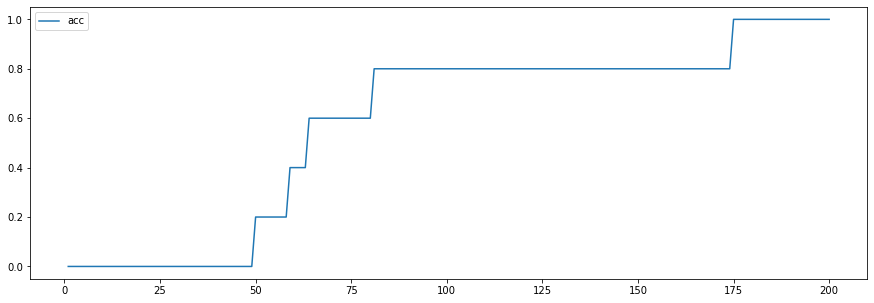

In [11]:
plt.figure(figsize=(15,5))
plt.plot(range(1,201),
        h.history['acc'],
        label='acc'
        )
plt.legend()
plt.show()